In [1]:
import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
# 정규화
train_scaled = train_input / 255.0

# 훈련, 검증 세트
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2
)

In [3]:
# 층을 구성하는 함수
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- model.fit() 내부에 사용하는 매개 변수
    - verbose -> 0(출력 X), 1(출력 O : 학습 진행율, 정확도, 로스, 에포크), 2(출력 O : 정확도, 로스, 에포크)

In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7629 - loss: 0.6848
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8584 - loss: 0.3980
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8691 - loss: 0.3618  
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8798 - loss: 0.3379  
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8869 - loss: 0.3193  


In [6]:
hist.history

{'accuracy': [0.8094791769981384,
  0.8578749895095825,
  0.8705416917800903,
  0.8790833353996277,
  0.8852083086967468],
 'loss': [0.5390535593032837,
  0.39560091495513916,
  0.36059269309043884,
  0.3387176990509033,
  0.323297381401062]}

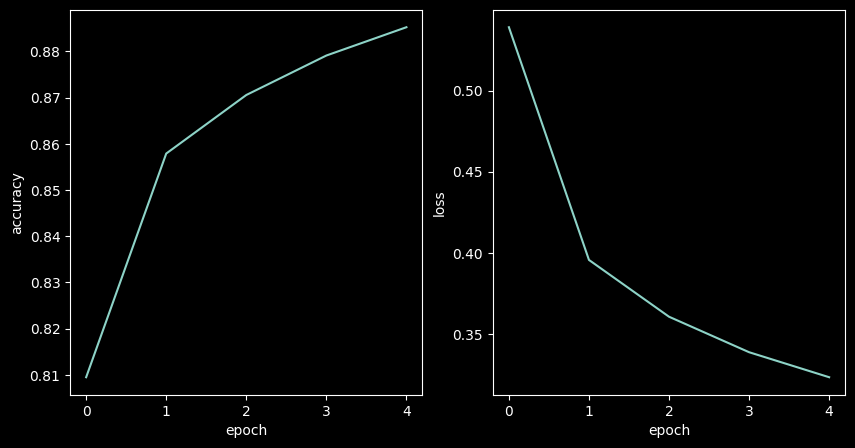

In [7]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.history['accuracy'], label = 'accuracy')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')

axs[1].plot(hist.history['loss'], label = '손실값')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss')
plt.show()

In [10]:
# 검증 손실

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7673 - loss: 0.6691 - val_accuracy: 0.8418 - val_loss: 0.4432
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8526 - loss: 0.4122 - val_accuracy: 0.8479 - val_loss: 0.4325
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8691 - loss: 0.3589 - val_accuracy: 0.8660 - val_loss: 0.3742
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8775 - loss: 0.3337 - val_accuracy: 0.8715 - val_loss: 0.3689
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8831 - loss: 0.3245 - val_accuracy: 0.8672 - val_loss: 0.3877
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8921 - loss: 0.3036 - val_accuracy: 0.8794 - val_loss: 0.3633
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8926 - loss: 0.2998 - val_accuracy: 0.8830 - val_loss: 0.3440
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9002 - loss: 0.2863 - 

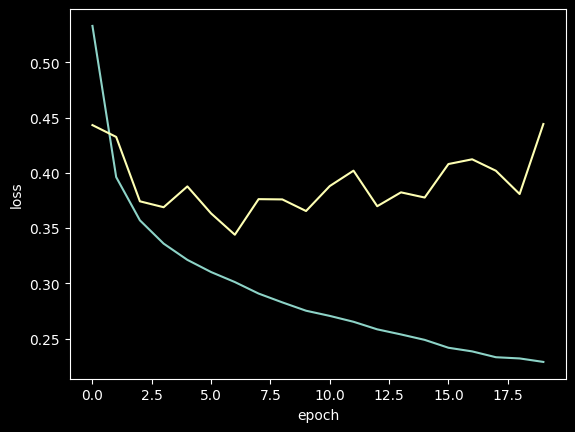

In [12]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
# 옵티마이저 - adam
model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.001) #lr : 기본값 0.1

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7653 - loss: 0.6792 - val_accuracy: 0.8454 - val_loss: 0.4329
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8523 - loss: 0.4143 - val_accuracy: 0.8648 - val_loss: 0.3998
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8681 - loss: 0.3621 - val_accuracy: 0.8651 - val_loss: 0.3843
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8794 - loss: 0.3345 - val_accuracy: 0.8662 - val_loss: 0.3723
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8813 - loss: 0.3222 - val_accuracy: 0.8791 - val_loss: 0.3375
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8910 - loss: 0.2967 - val_accuracy: 0.8789 - val_loss: 0.3376
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8967 - loss: 0.2843 - val_accuracy: 0.8849 - val_loss: 0.3379
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8993 - loss: 0.2719 - 

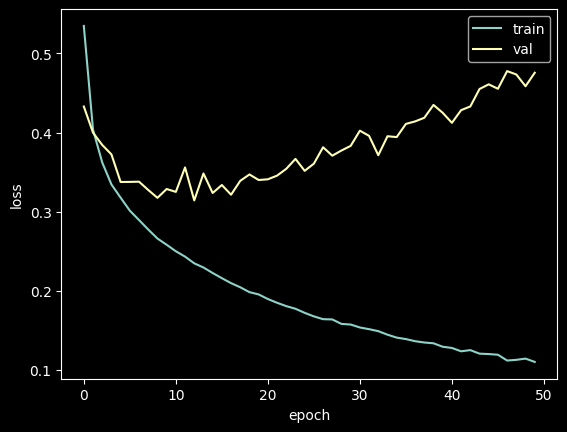

In [17]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
# 드롭 아웃 : 설정된 비율만큼 은닉층의 출력을 랜덤하게 0으로 만든다 // 과대적합 완화

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7226 - loss: 0.7845 - val_accuracy: 0.8437 - val_loss: 0.4378
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8377 - loss: 0.4506 - val_accuracy: 0.8581 - val_loss: 0.3906
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8517 - loss: 0.4109 - val_accuracy: 0.8716 - val_loss: 0.3658
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8595 - loss: 0.3840 - val_accuracy: 0.8678 - val_loss: 0.3662
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8673 - loss: 0.3664 - val_accuracy: 0.8752 - val_loss: 0.3547
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8674 - loss: 0.3632 - val_accuracy: 0.8783 - val_loss: 0.3482
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8696 - loss: 0.3515 - val_accuracy: 0.8778 - val_loss: 0.3400
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8731 - loss: 0.3388 - 

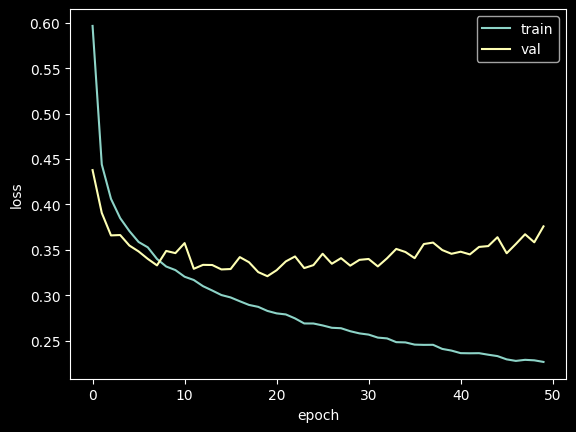

In [20]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
# 모델 저장, 복원 - 모델 저장, 가중치 저장

# 가중치 저장 - model.save_weights('파일명') # 파일명 확장자 h5
model.save_weights("model.weights.h5")

In [22]:
# 모델 저장 : 구조 + 가중치 - model.save("파일명") # 파일명 확장자 .keras
model.save('model-whole.keras')

In [23]:
# 가중치 파일로 모델 복구 - 원래 모델의 구조가 필요
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [24]:
import numpy as np
test_scaled = test_input / 255.0
predictions = model.predict(test_scaled[:10])
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# 가중치 값밖에 없기 때문에 손실값에 대한 정보 X => 모델 구성을 동일하게 구성하면 테스트 결과를 얻을 수 있음
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8839 - loss: 0.3917


[0.3924657702445984, 0.883400022983551]

In [26]:
# 전체 모델을 저장한 파일로 복구
model = keras.models.load_model('model-whole.keras')

In [27]:
predictions = model.predict(test_scaled[:10])
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [28]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8839 - loss: 0.3917


[0.3924657702445984, 0.883400022983551]

In [ ]:
# 콜백 - ModelCheckpoint : 검증 세트의 손실이 가장 낮은 최고의 모델을 찾아서 저장
# 콜백 - EarlyStopping : 조기 종료, patience : 검증 손실이 더 이상 개선되지 않는 횟수
#           monitor=['val_loss'] : 기본값
#           restore_best_weights : 가장 최적의 가중치로 복구

In [31]:
model = model_fn(keras.layers.Dropout(0.3))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True) # 검증세트의 손실값이 가장 낮은 모델로 저장

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7371 - loss: 0.7536 - val_accuracy: 0.8385 - val_loss: 0.4509
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8378 - loss: 0.4570 - val_accuracy: 0.8607 - val_loss: 0.3931
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8526 - loss: 0.4069 - val_accuracy: 0.8568 - val_loss: 0.3838
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8588 - loss: 0.3901 - val_accuracy: 0.8609 - val_loss: 0.3778
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8606 - loss: 0.3750 - val_accuracy: 0.8682 - val_loss: 0.3695
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8670 - loss: 0.3572 - val_accuracy: 0.8706 - val_loss: 0.3487
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8727 - loss: 0.3480 - val_accuracy: 0.8742 - val_loss: 0.3464
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8770 - loss: 0.3367 - 